# Problem Statement

To develope the classification based model which classify the movies review in positive and negative reviews

### Import Required Libraries

In [3]:
! pip install collections-extended
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
! pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=952712e3f2a78184b44fb8759be074adb432509e5e58ed5956878d88f0509e2b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
from langdetect import detect
from googletrans import Translator
from collections import Counter
from nltk.util import ngrams
import yake
from rake_nltk import Rake
from wordcloud import WordCloud
import contractions
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import word2vec

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# 1.a [Import the dataset]

In [6]:
data = pd.read_csv(r"/content/drive/MyDrive/MyAssignment/IMDB Dataset.csv")  # load the data

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.shape   # check the data size

(50000, 2)

In [25]:
data.sentiment.unique()    # check thr unique value of target feature

array(['positive', 'negative'], dtype=object)

<Axes: xlabel='sentiment', ylabel='count'>

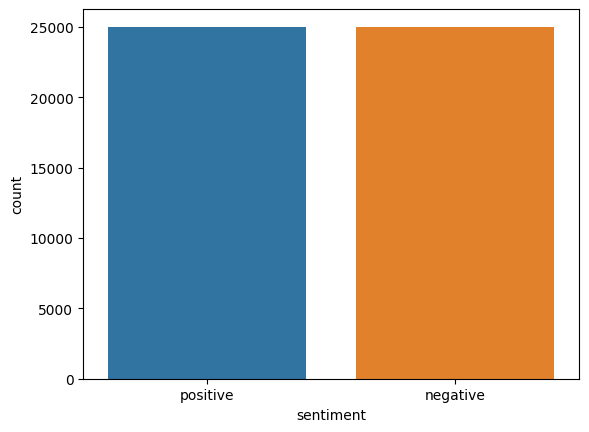

In [8]:
sns.countplot(x = data['sentiment'])    # we check wether data is balance or not

In [9]:
data.isna().sum()    # check the null values

review       0
sentiment    0
dtype: int64

### dataset information

1. In given dataset we have two features
      1. review : It contain a text data
      2. sentiment : It contain classification (Positive and Negative)

2. dataset contain a 50000 records and two features
3. dataset is balance
4. There is no null value present in data

1.a.1 We check the each review language this will help to understand the each review inforamtion i.e we create language feature which contain each review language

In [7]:
def lang_detect(data):
  lang = detect(data)
  return lang

In [8]:
lang_detect(data['review'][0])

'en'

In [9]:
data['language'] = data['review'].apply(lang_detect)

In [10]:
data.head(3)

,review,sentiment,language
0,One of the other reviewers has mentioned that ...,positive,en
1,A wonderful little production. <br /><br />The...,positive,en
2,I thought this was a wonderful way to spend ti...,positive,en


In [11]:
data['language'].value_counts()

en    49999
id        1
Name: language, dtype: int64

all the reviews are in english language

### Exploratory Data Analysis
#### Using below techniques we get the most frequent word and the important keyphrased
1. n-gram  : We break the text in unigram,bigram and trigram
2. word-cloud : We get the most frequent word in bolt and big size
3. keyphrase extraction : we get the important keyphrases from review
    1. YAKE
    2. RAKE

#### **1. n-gram**

In [10]:
def ngram_extractor(data,ngram_range):
  token = word_tokenize(data)
  ngram = ngrams(token,ngram_range)     # zip file
  ngram_list = []
  for ngram1 in ngram:
    ngram_list.append(" ".join(ngram1))
  return ngram_list



Unigram

In [15]:
unigram_list = data.review.apply(lambda x : ngram_extractor(x,1))

In [16]:
unigram_list

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production, ., <, br, /...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there, 's, a, family, where, a, li...
4        [Petter, Mattei, 's, ``, Love, in, the, Time, ...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot, ,, bad, dialogue, ,, bad, acting, ...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I, 'm, going, to, have, to, disagree, with, t...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [18]:
final_unigram = []
for i in unigram_list:
  final_unigram.extend(i)

cnt = Counter(final_unigram).most_common(50)
cnt



[('the', 573398),
 (',', 544030),
 ('.', 467982),
 ('and', 309118),
 ('a', 309103),
 ('of', 285087),
 ('to', 263658),
 ('is', 214740),
 ('/', 202455),
 ('>', 202250),
 ('<', 202094),
 ('br', 201948),
 ('in', 173139),
 ('I', 163294),
 ('it', 151931),
 ('that', 137744),
 ("'s", 121768),
 ('this', 120442),
 ('was', 99090),
 ('The', 87819),
 ('as', 85000),
 ('with', 84743),
 ('movie', 83813),
 ('for', 82594),
 ('film', 75940),
 (')', 71268),
 ('(', 69585),
 ('but', 68864),
 ("''", 66435),
 ("n't", 65930),
 ('``', 65695),
 ('on', 64621),
 ('you', 61807),
 ('are', 59379),
 ('not', 57052),
 ('have', 56188),
 ('his', 54573),
 ('be', 52361),
 ('!', 49164),
 ('he', 48041),
 ('one', 47091),
 ('at', 43361),
 ('by', 42842),
 ('an', 41376),
 ('all', 41242),
 ('who', 40615),
 ('they', 38718),
 ('from', 38646),
 ('like', 37671),
 ('It', 35619)]

#### we didn't get useful insights from unigram need some initial preprocessing

##### we do the some initial preprocessing
1. contraction mapping : Expand the text
2. remove stopword
3. remove punctuations
4. perform noramlizations : we convert all the text into small case

In [20]:
# 1) contraction mapping
def expand_text(data):
  expanded_text = contractions.fix(data)
  return expanded_text

# 2) data cleaning
#### we keep the not, nor and no in stopword list because on the basis of no,not and nor help to decide the negative and the positive review
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
stopword_list.remove('nor')

### in this function we do the word tokenization , remove stopword, remove punctuations, normalization, only consider
###alphabates
def clean_data(data):
  tokens = word_tokenize(data)    # break the text word by word
  clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
  return clean_text

In [21]:
clean_text_data = data.review.apply(expand_text)


In [22]:
clean_text_data = clean_text_data.apply(clean_data)


In [23]:
clean_text_data  # here we get the clean data

0        [one, reviewers, mentioned, watching, episode,...
1        [wonderful, little, production, filming, techn...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, not, creati...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movies, high, art, ...
Name: review, Length: 50000, dtype: object

Ungram after data cleaning

In [30]:
unigram_list = clean_text_data.apply(lambda x : ngram_extractor(" ".join(x),1))
final_unigram = []
for i in unigram_list:
  final_unigram.extend(i)

cnt = Counter(final_unigram).most_common(25)
cnt    # we get most frequent 25 words


[('not', 129664),
 ('movie', 85070),
 ('film', 76919),
 ('one', 51828),
 ('like', 39183),
 ('would', 31079),
 ('good', 28767),
 ('even', 24780),
 ('time', 23481),
 ('really', 23024),
 ('see', 22641),
 ('story', 22341),
 ('well', 19041),
 ('much', 19020),
 ('could', 18542),
 ('get', 18264),
 ('people', 17983),
 ('great', 17918),
 ('also', 17873),
 ('bad', 17837),
 ('first', 17200),
 ('made', 15458),
 ('make', 15320),
 ('way', 15254),
 ('movies', 14779)]

In [33]:
a = dict(cnt)
unigram_df = pd.DataFrame({
    "word":a.keys(),
    "frequency":a.values()
})
unigram_df     # this dataframe contain most frequent 25 word and his frequence

,word,frequency
0,not,129664
1,movie,85070
2,film,76919
3,one,51828
4,like,39183
5,would,31079
6,good,28767
7,even,24780
8,time,23481
9,really,23024


Bigram

In [34]:
bigram_list = clean_text_data.apply(lambda x : ngram_extractor(" ".join(x),2))
final_bigram = []
for i in bigram_list:
  final_bigram.extend(i)

cnt = Counter(final_bigram).most_common(25)
cnt    # we get most frequent 25 bigrams


[('not even', 4558),
 ('movie not', 4392),
 ('could not', 4040),
 ('not know', 3445),
 ('film not', 3278),
 ('would not', 3030),
 ('ever seen', 2587),
 ('not really', 2558),
 ('not get', 2359),
 ('special effects', 2175),
 ('even though', 2006),
 ('not think', 1951),
 ('one best', 1888),
 ('not like', 1868),
 ('not much', 1850),
 ('not bad', 1786),
 ('not good', 1719),
 ('not make', 1689),
 ('looks like', 1630),
 ('not see', 1527),
 ('really not', 1487),
 ('see movie', 1464),
 ('much better', 1442),
 ('waste time', 1439),
 ('not want', 1388)]

In [35]:
a = dict(cnt)
bigram_df = pd.DataFrame({
    "word":a.keys(),
    "frequency":a.values()
})
bigram_df     # this dataframe contain most frequent 25 bigram and his frequence

,word,frequency
0,not even,4558
1,movie not,4392
2,could not,4040
3,not know,3445
4,film not,3278
5,would not,3030
6,ever seen,2587
7,not really,2558
8,not get,2359
9,special effects,2175


In [36]:
trigram_list = clean_text_data.apply(lambda x : ngram_extractor(" ".join(x),3))
final_trigram = []
for i in trigram_list:
  final_trigram.extend(i)

cnt = Counter(final_trigram).most_common(25)
cnt    # we get most frequent 25 bigrams


[('not waste time', 532),
 ('movie ever seen', 492),
 ('worst movie ever', 463),
 ('movies ever seen', 361),
 ('one worst movies', 316),
 ('not make sense', 290),
 ('worst movies ever', 287),
 ('not get wrong', 285),
 ('new york city', 266),
 ('would not recommend', 224),
 ('movie not even', 224),
 ('films ever seen', 212),
 ('film ever seen', 211),
 ('could not help', 208),
 ('worst film ever', 205),
 ('could not believe', 204),
 ('movie ever made', 200),
 ('not watch movie', 182),
 ('could not even', 182),
 ('not even know', 178),
 ('would like see', 175),
 ('could not get', 173),
 ('waste time money', 173),
 ('one best movies', 172),
 ('one worst films', 172)]

In [37]:
a = dict(cnt)
trigram_df = pd.DataFrame({
    "word":a.keys(),
    "frequency":a.values()
})
trigram_df     # this dataframe contain most frequent 25 bigram and his frequence

,word,frequency
0,not waste time,532
1,movie ever seen,492
2,worst movie ever,463
3,movies ever seen,361
4,one worst movies,316
5,not make sense,290
6,worst movies ever,287
7,not get wrong,285
8,new york city,266
9,would not recommend,224


On the basis of keyphrase extraction methode we conclude that:
1. most frequent word in unigram is not and whose frequency is 129664
2. most frequent word in bigram is not even	and whose frequency is 4558
3. most frequent word in trigram is not waste time and whose frequency is 532

### **2. word cloud**

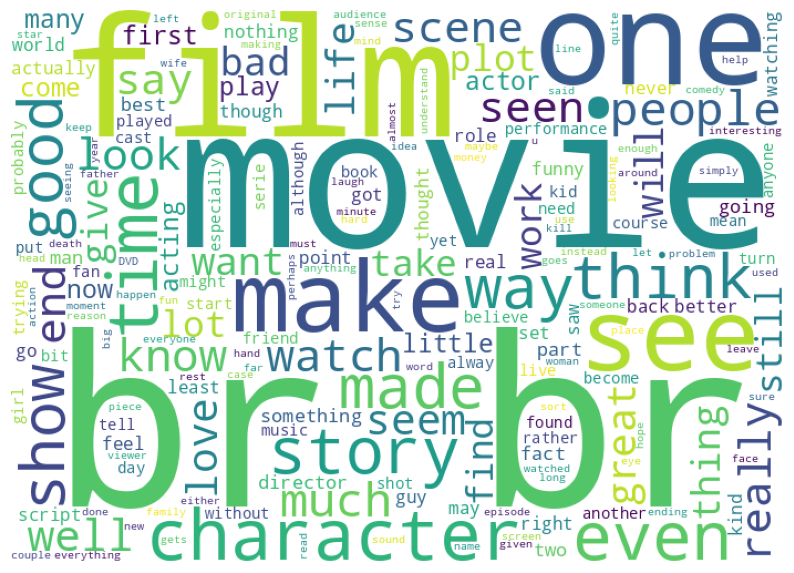

In [38]:
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=' ')
  text = ' '.join([word for word in df_.split()])
  wordcloud = WordCloud(width=700,height=500,background_color='white').generate(text)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

wordcloud(data,'review')

Here in word cloud we get movie , film charactor and good word in bolt and bigger size format this word are most frequent word

### 3. Keyphrase extraction

In [39]:
# 1. Yake

In [5]:
# In this function we get important keyword from each review using yake
def yake_extractor(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data)
  keyword_list = []
  for kw in keywords:## kw = (keyword,score)
    keyword_list.append(kw[0])
  return keyword_list

In [6]:
#
yake_keywords = data.review.apply(yake_extractor)
yake_keywords

0        [reviewers has mentioned, Security State Penit...
1        [Michael Sheen, Williams' diary entries, wonde...
2        [hot summer weekend, air conditioned theater, ...
3        [Rambo and kill, Jake decides, soap opera, kil...
4        [visually stunning film, visually stunning, Pe...
                               ...                        
49995    [good job, movie, thought this movie, job, tho...
49996    [annoying porn groove, porn groove soundtrack,...
49997    [parochial elementary schools, Jesuit priests,...
49998    [side with Maltin, previous comment, comment a...
49999    [Star Trek movies, Star Trek, Trek movies, hig...
Name: review, Length: 50000, dtype: object

In [9]:
# here we count the frequency of important words
all_keywords = []
for kw in yake_keywords:
  all_keywords.extend(kw)
cnt_yake = Counter(all_keywords).most_common(25)
cnt_yake

[('movie', 16931),
 ('film', 12717),
 ('good', 3719),
 ('time', 2852),
 ('movies', 2843),
 ('story', 2617),
 ('bad', 2573),
 ('people', 2076),
 ('great', 2068),
 ('made', 1767),
 ('films', 1741),
 ('watch', 1685),
 ('show', 1662),
 ('love', 1420),
 ('plot', 1363),
 ('characters', 1305),
 ('DVD', 1280),
 ('acting', 1270),
 ('make', 1212),
 ('funny', 1182),
 ('life', 1164),
 ('watching', 1161),
 ('worst', 1118),
 ('character', 1082),
 ('years', 1064)]

Here we get the movie, film, good, time, movies are most important words.

In [10]:
# RAKE

In [11]:
# In this function we get important keyword from each review using rake
def rake_extractor(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()
rake_keywords = data.review.apply(rake_extractor)

In [12]:
# here we count the frequency of important words
all_keywords = []
for kw in rake_keywords:
  all_keywords.extend(kw)
cnt_rake = Counter(all_keywords).most_common(25)
cnt_rake

[('movie', 49041),
 ('film', 42779),
 ('one', 25327),
 ('see', 15876),
 ('time', 12437),
 ('like', 11304),
 ('story', 11122),
 ('well', 10963),
 ('think', 10653),
 ('watch', 10245),
 ('get', 9665),
 ('make', 9430),
 ('way', 9385),
 ('know', 9335),
 ('even', 8888),
 ('end', 8488),
 ('made', 8217),
 ('much', 8204),
 ('br />< br />', 8130),
 ('would', 7916),
 ('good', 7815),
 ('say', 7238),
 ('seen', 7052),
 ('people', 7012),
 ('characters', 6996)]

Here we get movie, film, one, see and time most important keyword

# 1.b.2 [Preprocess the dataset]

In [7]:
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [8]:
# We split the dataset in train and test
x = data['review']        # independent feature
y = data['sentiment']     # dependent feature
# we used the 25% data for test and 75% data for training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37500,)
(12500,)
(37500,)
(12500,)


for
1. x_train : we used the 37500 record
2. x_test : we used the 12500 records
3. y_train : we used the 37500 records
4. y_test : we used the 12500 records

In [10]:
y_train.value_counts()

negative    18843
positive    18657
Name: sentiment, dtype: int64

from y_train and y_test we replace the positive review as 1 and negative review as 0 because model understand the only numeric value

In [11]:
y_train.replace({'negative':0,'positive':1},inplace=True)
y_test.replace({'negative':0,'positive':1},inplace=True)

In [12]:
print(y_train)   # we replace the positive and negative with 1 and 0

27434    0
13400    0
883      0
7303     0
45124    1
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 37500, dtype: int64


In [13]:
clean_text_train = x_train.apply(remove_spaces)   # remove the spaces and blank lines from training review
clean_text_test = x_test.apply(remove_spaces)     # remove the spaces and blank lines from test data review

clean_text_train = clean_text_train.apply(expand_text) # expand the text from training review
clean_text_test = clean_text_test.apply(expand_text)   # expand the text from test data review

clean_text_train = clean_text_train.apply(handling_accented) # handle the accented charactor from training review
clean_text_test = clean_text_test.apply(handling_accented)   # handle the accented charactor from test review

# remove punctuations, stopword, normalize the text data, consider only alphabets from train data
clean_text_train = clean_text_train.apply(clean_data)
# remove punctuations, stopword, normalize the text data, consider only alphabets from test data
clean_text_test = clean_text_test.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)# convert the word into into its meaningful format from train data
clean_text_test = clean_text_test.apply(lemmatization)# convert the word into into its meaningful format from test data

In [25]:
clean_text_train  # after data cleaning

27434    figure alternate reality teen flick precisely ...
13400    kind movie want good suck first thing hell pun...
883      far worst movie ever seen compared alexander f...
7303     awful awful awful loved original film funny ch...
45124    fragile carne great period although sometimes ...
                               ...                        
11284    shadow magic recapture joy amazement first mov...
44732    found movie quite enjoyable fairly entertainin...
38158    avoid one terrible movie exciting pointless mu...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bit short time pa...
Name: review, Length: 37500, dtype: object

### Feature Engineering

In feature engineering we convert the text into numeric form
we have multiple types of methode to convert the text to numeric form
1. TFIDF
2. count vectorizer
3. word2vec

Count vectorizer

In [21]:
count = CountVectorizer(max_df=0.95,max_features=1000)
# max_df is used for removing terms that appear too frequently
# we create 1000 features
count_val_train = count.fit_transform(clean_text_train)
count_val_test = count.transform(clean_text_test)

In [22]:
df_count_vect = pd.DataFrame(count_val_train.A,columns=count.get_feature_names_out())
print(df_count_vect)

       ability  able  absolutely  accent  across  act  acted  acting  action  \
0            0     0           0       0       0    0      0       0       0   
1            0     0           0       0       0    0      0       0       0   
2            0     0           0       0       0    0      0       0       0   
3            0     0           0       0       0    0      0       0       0   
4            0     0           0       0       0    0      0       0       0   
...        ...   ...         ...     ...     ...  ...    ...     ...     ...   
37495        1     0           0       0       0    0      0       0       0   
37496        0     0           0       0       0    0      0       0       0   
37497        0     0           0       0       0    0      0       0       0   
37498        0     0           1       0       0    0      0       0       0   
37499        0     0           0       0       0    0      0       2       3   

       actor  ...  wrong  wrote  yeah  

In [16]:
df_count_vect.shape

(37500, 1000)

# **1.c Create a model to perform sentiment analysis and perform hyper parameter tuning and also evaluate the models**

1. Multinomial naive bays

In [31]:
count_mnb = MultinomialNB()
count_mnb.fit(count_val_train.A,y_train)
predict_count = count_mnb.predict(count_val_test.A)
accuracy_count = accuracy_score(y_test,predict_count)*100
accuracy_count

83.352

In [32]:
ConfusionMatrix = confusion_matrix(y_test,predict_count)
ConfusionMatrix

array([[5092, 1065],
       [1016, 5327]])

In [33]:
ClassReport = classification_report(y_test,predict_count)
print(ClassReport)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6157
           1       0.83      0.84      0.84      6343

    accuracy                           0.83     12500
   macro avg       0.83      0.83      0.83     12500
weighted avg       0.83      0.83      0.83     12500



2. Gausions NB

In [26]:
count_gnb = GaussianNB()
count_gnb.fit(count_val_train.A,y_train)
predict_count = count_gnb.predict(count_val_test.A)
accuracy_count = accuracy_score(y_test,predict_count)*100
accuracy_count

80.50399999999999

3. Barnaullis NB

In [27]:
count_bnb = BernoulliNB()
count_bnb.fit(count_val_train.A,y_train)
predict_count = count_bnb.predict(count_val_test.A)
accuracy_count = accuracy_score(y_test,predict_count)*100
accuracy_count

83.048

### Multinomial Naive bays gives the better accuracy we select the multinomial naive bays algoritham

## 1.e Save the model

We used the pickle file to save the model

In [34]:
import pickle

In [35]:
pickle.dump(count, open('count1.pkl', "wb"))    # count vectorizer pickel file

In [36]:
pickle.dump(count_mnb, open('model2.pkl', "wb"))  # model training pickle file